# Koch curve

<div dir='rtl'><h1 id="koch">رسم برفدانه کخ: </h1></div>
<div dir='rtl'> برای این کار از تابع f_koch استفاده کرده ایم که در آن با چهار عملگر زیر، چهار نقطه جدید را میسازد:

* f1: نقطه ورودی را به اندازه 1/3 کوچک میکند که میشود نقطه دوم طرح
* f2:  نقطه ورودی را به اندازه 1/3 کوچک کرده و 60 درجه پادساعتگرد میچرخاند و بعلاوه f1 میکند تا نقطه سوم طرح بدست آید.
* f3: نقطه ورودی را به اندازه 1/3 کوچک میکند و سپس انتقال می یابد تا بشود نقطه چهارم طرح
* f4: همانند تابع f3  و انتقال برای مشخص شدن نقطه نهایی طرح

 و خروجی میدهد. سپس تابع اصلی koch در نهایت با گرفتن تعداد مرحله فراکتال، این فرایند تولید نقطه را تکرار میکند و در یک لیست میریزد و بالاخره تابع plot coords لیست نقاط را به هم وصل کرده و شکل را ترسیم میکند.
</div>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def Rotation(theta): #this fuction create the rotation matrix with theta in degrees
  theta = np.radians(theta)
  c, s = np.cos(theta), np.sin(theta)
  R = np.array(((c, -s), (s, c)))
  return R

def f_koch(points): #this fuction gets the older points and create all the new points for every level.
  try:
    new_list = []
    f1 = np.dot(np.array([[1/3,0],[0,1/3]]),points) #f1: just scaling with 1/3(create first point)
    new_list.append(f1)
    f2 = np.dot(Rotation(60),np.dot(np.array([[1/3,0],[0,1/3]]),points)) 
    f2 = f2 + f1
    #f2: scale, rotate and shift(create 2nd point)
    new_list.append(f2)
    f3 = np.dot(np.array([[1/3,0],[0,1/3]]),points) 
    f3 = f3 + f1
    #f3: just scaling with 1/3 and shift(create 3rd point)
    new_list.append(f3)
    f4 = np.dot(np.array([[1/3,0],[0,1/3]]),points)  
    f4 = f4 + f3
    #f4: just scaling with 1/3 and shift(create 4th point)
    new_list.append(f4)
    return new_list
  except:
    return "something went wrong!"

In [ ]:
import matplotlib.pyplot as plt
#this function change the list to X, Y that can be plot and then plot
def plot_coords(coords, color, m, bare_plot=False):
    if bare_plot:
        # Turns off the axis markers.
        plt.axis('off')
    # Ensures equal aspect ratio.
    plt.axes().set_aspect('equal', 'datalim')
    # Converts a list of coordinates into 
    # lists of X and Y values, respectively.
    X, Y = zip(*coords)
    # Draws the plot.
    plt.rcParams["figure.figsize"] = (20,12)
    plt.plot(X, Y, linewidth= 0.5, color= color)
    plt.title('The level of fractal = {}'.format(m), loc = 'center', fontsize = 'xx-large')

In [ ]:
# this function gets the m_level of iteration and export the fractal
def koch(m, color):
  point_list = [np.array([0,0]), np.array([1,0])]
  tot_list = [np.array([0, 0])]
  n=0
  while n<m:
    tot_list = [np.array([0, 0])]
    for i in range(1, len(point_list)):
      # generate the new points and concatenate to the tot_list
      l = (tot_list, f_koch(point_list[i]-point_list[i-1]) + point_list[i-1])
      tot_list = np.vstack(l)
    point_list = [np.array([0,0])] + tot_list 
    n+=1
  return plot_coords(tot_list, color, m)
  

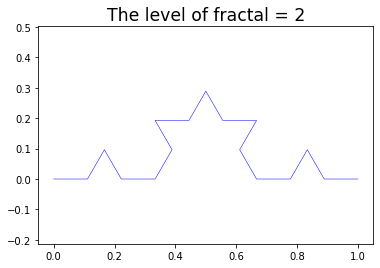

In [ ]:
koch(2, 'blue')

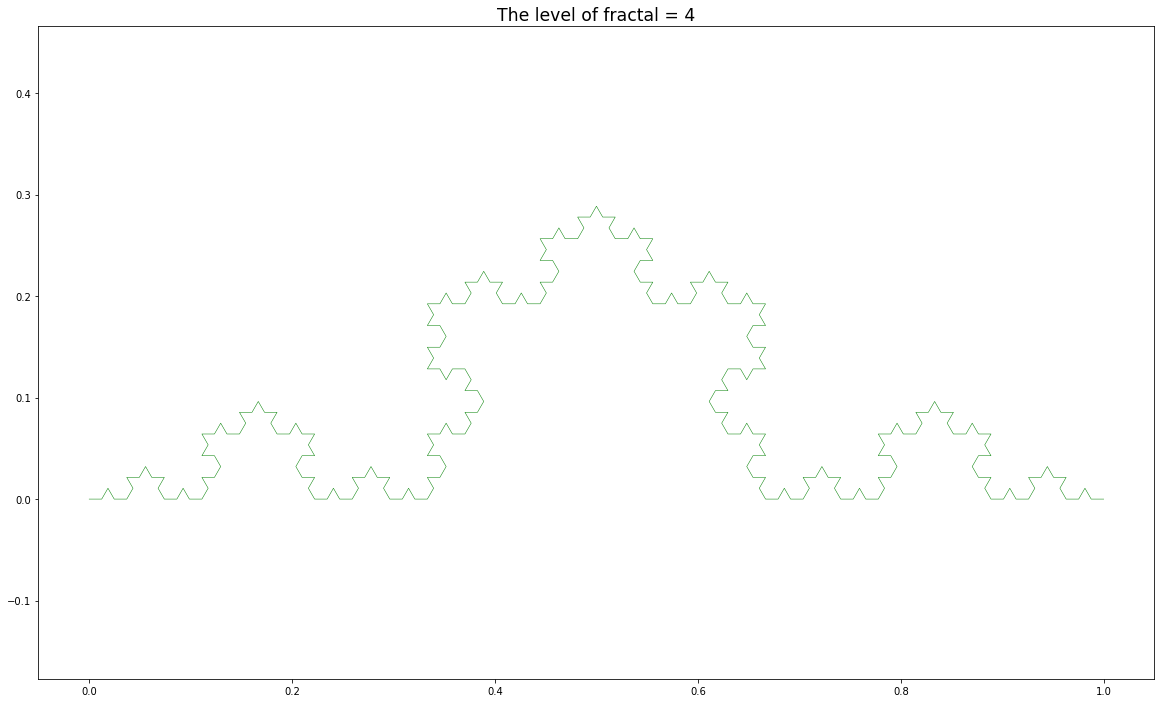

In [ ]:
koch(4, 'green')

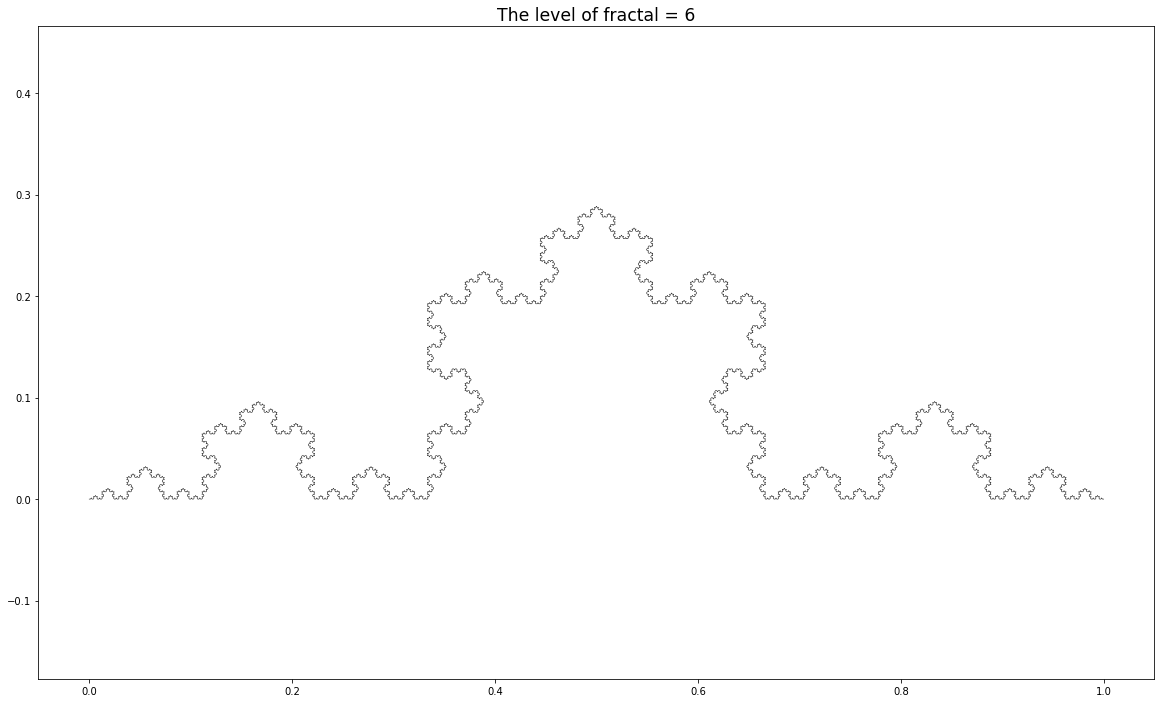

In [ ]:
koch(6, 'black')

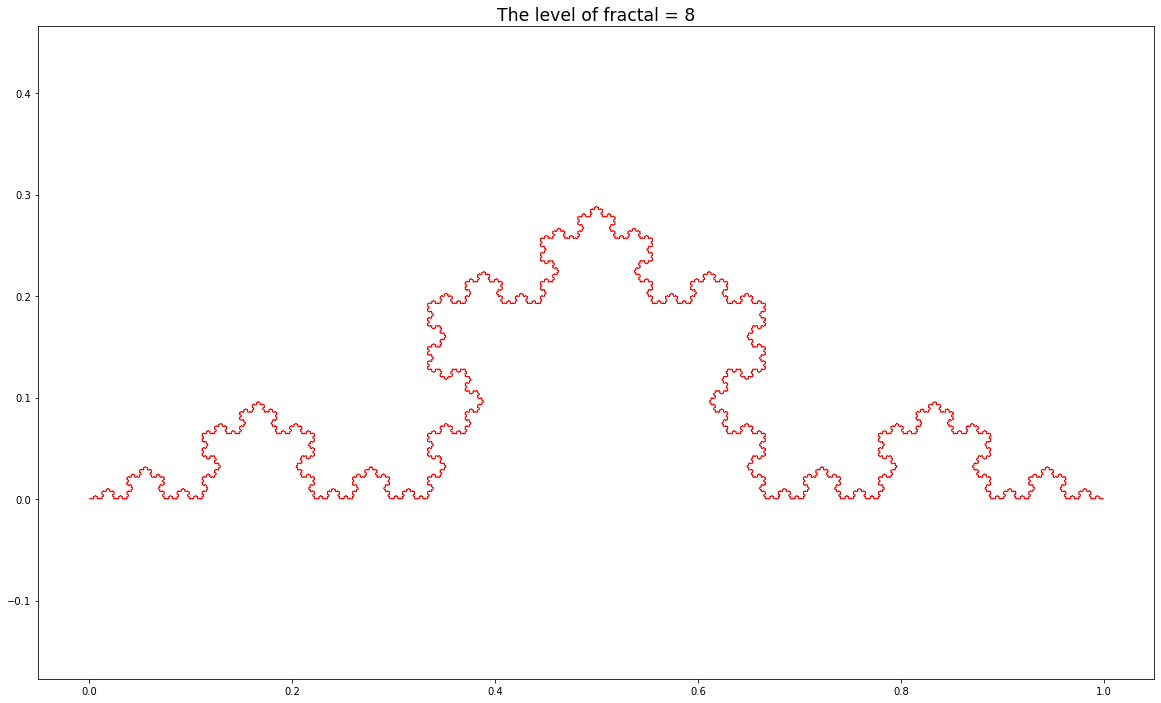

In [ ]:
koch(8, 'red')

# Heighway dragon curve

<div dir='rtl'><h1 id="koch">رسم اژدهای های وی : </h1></div>
<div dir='rtl'> برای رسم این فراکتال، از دو تابع f1,f2 برای تولید نقاط جدید استفاده میکنیم که f1 طول را به اندازه 0.5^(1/2) کوچک و به اندازه 45 درجه پادساعتگرد میچرخاند و f2 هم طول را به اندازه 0.5^(1/2) کوچک و به اندازه  45 درجه ساعتگرد میچرخاند. سپس تابع اصلی heighway به صورت یک در میان نقاط را به این توابع میدهد و نقاط جدید را تولید کرده و در لیست ذخیره میکند و در نهایت تابع رسم ای که قبلا توضیح دادیم، لیست نقاط را به هم وصل کرده و شکل خروجی را میدهد.
</div>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def Rotation(theta):
  theta = np.radians(theta)
  c, s = np.cos(theta), np.sin(theta)
  R = np.array(((c, -s), (s, c)))
  return R
#f1: this fuction scales and rotates the point counterclockwise
def f1(points):
    new_list = []
    f1 = np.dot(Rotation(45),np.dot(np.array([[1/(2**0.5),0],[0,1/(2**0.5)]]),points)) 
    new_list.append(f1)
    return new_list

#f2: this fuction scales and rotates the point clockwise
def f2(points):
    new_list = []
    f2 = np.dot(Rotation(-45),np.dot(np.array([[1/(2**0.5),0],[0,1/(2**0.5)]]),points)) #f1
    new_list.append(f2)
    return new_list

In [ ]:
import matplotlib.pyplot as plt
def plot_coords(coords, color, m, bare_plot=False):
    if bare_plot:
        # Turns off the axis markers.
        plt.axis('off')
    # Ensures equal aspect ratio.
    plt.axes().set_aspect('equal', 'datalim')
    # Converts a list of coordinates into 
    # lists of X and Y values, respectively.
    X, Y = zip(*coords)
    # Draws the plot.
    plt.rcParams["figure.figsize"] = (20,12)
    plt.plot(X, Y, linewidth= 0.5, color= color)
    plt.title('The level of fractal = {}'.format(m), loc = 'center', fontsize = 'xx-large')

In [ ]:
# this function gets the m_level of iteration and 
# uses previous functions to export the fractal
def heighway(m, color):
  point_list = [np.array([0,0]), np.array([1,0])]
  tot_list = [np.array([0, 0])]
  n=0
  while n<m:
    tot_list = [np.array([0, 0])]
    for i in range(1, len(point_list)):
      # generate new points with every other one iteration on f1 and f2
      # and then concatenate new_points to the tot_list
      if i%2==1:
          l = (tot_list, f1(point_list[i]-point_list[i-1]) + point_list[i-1], point_list[i])
          tot_list = np.vstack(l)
      else:
          l = (tot_list, f2(point_list[i]-point_list[i-1]) + point_list[i-1], point_list[i])
          tot_list = np.vstack(l)  
   
    g = (tot_list, [np.array([1, 0])])
    tot_list = np.vstack(g)
    point_list = [np.array([0,0])] + tot_list 
    n+=1
  return plot_coords(tot_list, color, m)

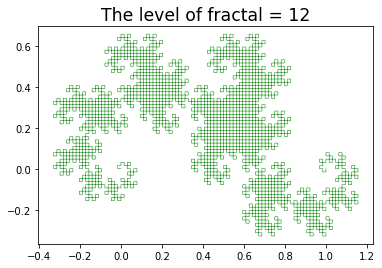

In [ ]:
heighway(12, 'green')

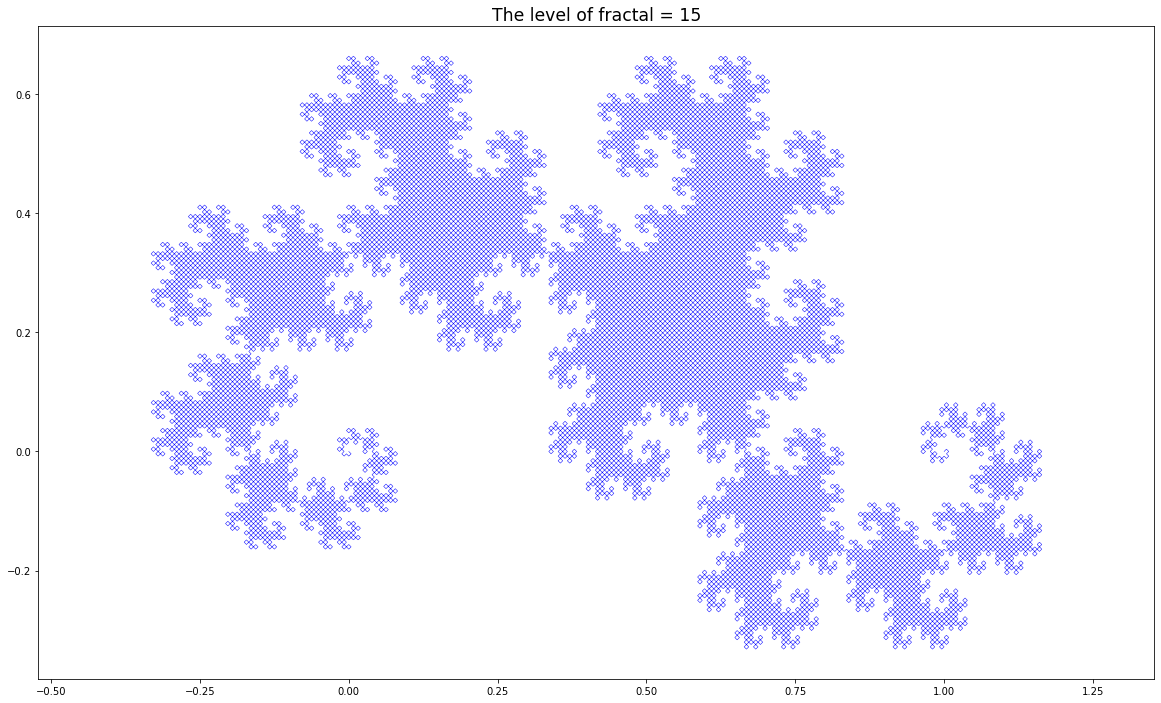

In [ ]:
heighway(15, 'blue')

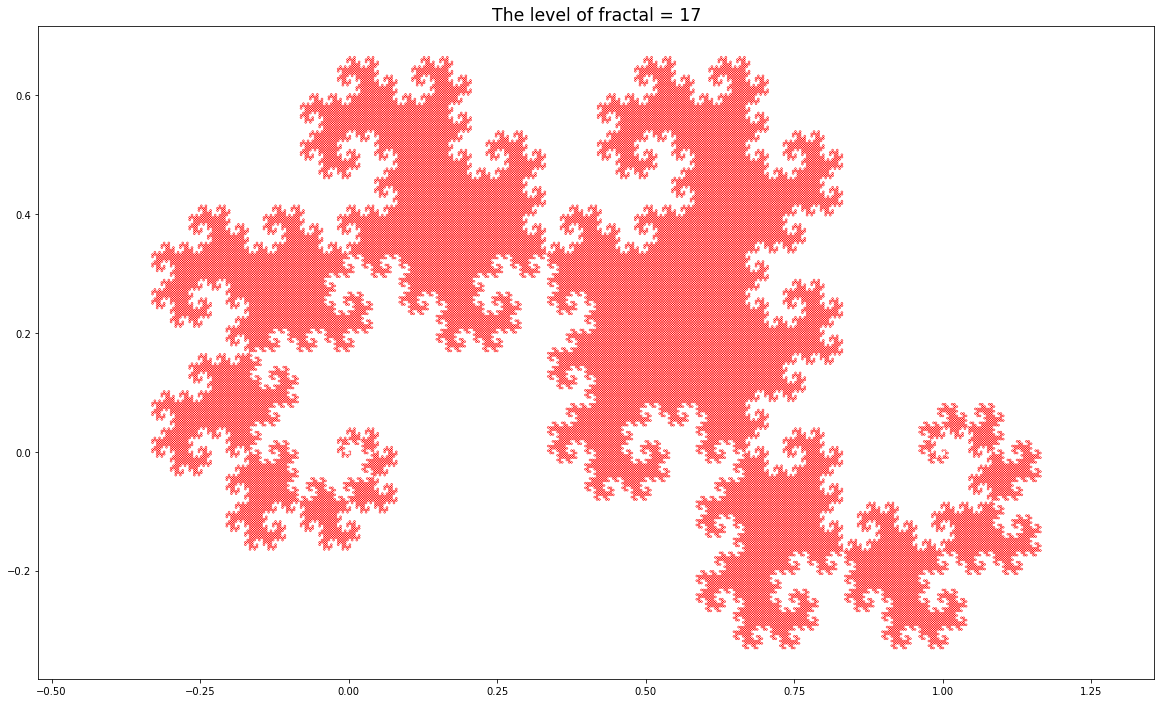

In [ ]:
heighway(17, 'red')

# Sierpiński triangle

<div dir='rtl'><h1 id="sierpinski"> مثلث سرپینسکی با الگوریتم تعینی : </h1></div>
<div dir='rtl'> برای رسم این مثلث با استفاده از تابع  NewTriangle در هربار سه نقطه مثلث قدیمی را میگیریم و سه  مثلث جدید داخل مثلث قدیمی را با استفاده از تجانس و جابجایی مشخص و تولید کرده و به لیست نقاط نهایی برای پرکردن اضافه میکنیم. به عبارت دیگر، با گرفتن نقاط مثلث بزرگتر، نقاط میانی هر ضلع را مشخص کرده و سپس مثلث های کوچک حاصل از نقاط میانی را مشخص میکنیم و به لیست نهایی برای رسم کلیه مثلث ها اضافه میکنیم. در نهایت با استفاده از تابع Display مثلث های حاصل از نقاط را پر کرده و شکل نهایی را میدهیم.
</div>

In [ ]:
#importing modules:
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import numpy as np
# this function gets the three points and create new triangles with points between the old triangle
def NewTrinagle(Pos = np.array([ np.array([0,0]) , np.array([50,50*3**0.5]) , np.array([100,0]) ]) ):

    newTrinagle = []

    line21 = (Pos[2][:] - Pos[1][:])/2
    line10 = (Pos[1][:] - Pos[0][:])/2
    line20 = (Pos[2][:] - Pos[0][:])/2

    newTrinagle.append(np.array([Pos[0][:]+line20 , Pos[1][:]+line21 ,Pos[2][:] ]))
    newTrinagle.append(np.array([Pos[0][:] , Pos[0][:]+line10 ,Pos[0][:]+line20 ]))
    newTrinagle.append(np.array([Pos[0][:]+line10 , Pos[1][:] ,Pos[1][:]+line21 ]))

    return newTrinagle

# this function display the fractal
def Display(n):
    # initialization
    oldtr = NewTrinagle()
    # generate new_triangles and put it in oldtr to plot
    for i in range(n-1):
        newtr =[]
        for tr in oldtr:
            newtr = newtr + NewTrinagle(tr)
        oldtr = newtr
        
    plt.rcParams["figure.figsize"] = (10,10)
    plt.ylim(0,100)
    plt.xlim(0,100)
    plt.title(f"level = %s"%n)
    ax = plt.axes()
    for tr in oldtr:
        ax.add_patch(Polygon(tr))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


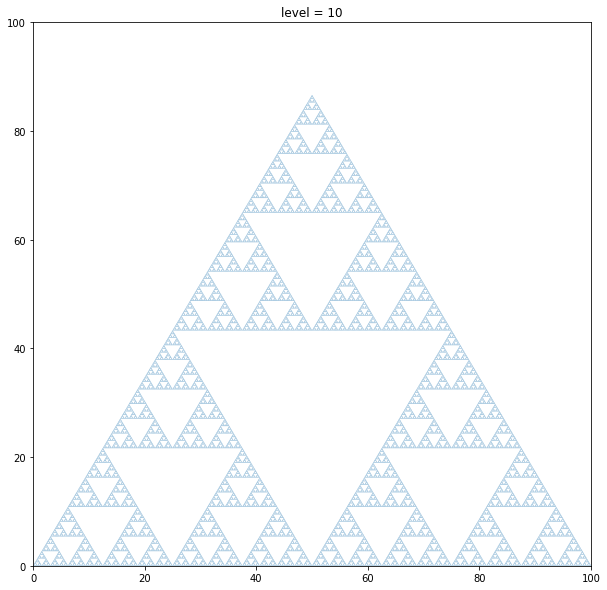

In [ ]:
n = 10
Display(n)

# Sierpiński triangle with radnom algorithm

<div dir='rtl'><h1 id="sierpinski"> مثلث سرپینسکی با الگوریتم تصادفی : </h1></div>
<div dir='rtl'> برای رسم این مثلث با استفاده از تابع  Random_Serpinski ابتدا یک نقطه بطور تصادفی تولید کرده و در یک حلقه 30 بار تغییرات 1،2 یا 3 را که این هم به طور تصادفی مشخص میشود اعمال میکنیم و نقطه نهایی را به لیست نهایی اضافه میکنیم. این کار را برای حدود 10000 بار انجام میدهیم و در آخر با استفاده از رسم پراکندگی، نقاط حاصل را با رنگ های مختلف روی صفحه مشخص میکنیم.
</div>

In [ ]:
# this function gets the level of fractal: m 
# and generate the points with random algorithm
def Random_Serpinski(m):
  # initialization with generating first random point
  x, y = np.random.randint(1,1000, 2)
  p=30
  x_points = []
  y_points = []
  for j in range(m):
    i=0
    while i<p:
          # random choice between{1, 2, 3} and We affect the changes
          n = np.random.randint(1,4)
          if n==1:
            x = x/2
            y = y/2
          elif n==2:
            x = x/2 + 1/2
            y = y/2
          else:
            x = x/2 + 1/4
            y = y/2 + (3**0.5)/4
          i += 1
    x_points.append(x)
    y_points.append(y)
  return x_points, y_points

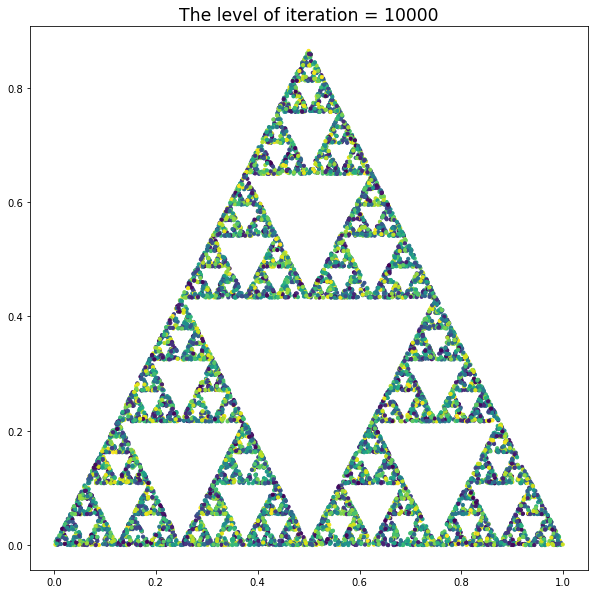

In [ ]:
# here, we generate the points, and plot it with scatter plot
m = 10000
X, Y=Random_Serpinski(m)
# using unique color for every point
colors = np.random.rand(m)
plt.scatter(X, Y, c=colors, s=10)
plt.title('The level of iteration = {}'.format(m), loc = 'center', fontsize = 'xx-large')
plt.show()

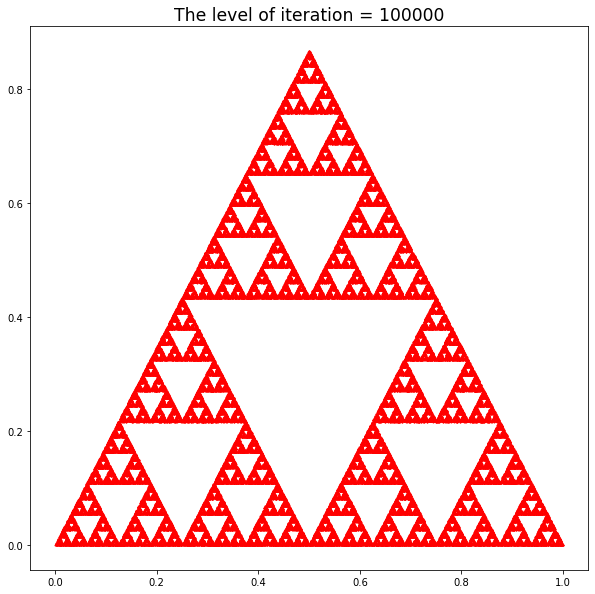

In [ ]:
m = 100000
X, Y=Random_Serpinski(m)
plt.scatter(X, Y, c='red', s=1)
plt.title('The level of iteration = {}'.format(m), loc = 'center', fontsize = 'xx-large')
plt.show()

# Khayyam_Pascal's triangle

<div dir='rtl'><h1 id="sierpinski"> مثلث سرپینسکی با استفاده از مثلث خیام-پاسکال : </h1></div>
<div dir='rtl'><h2>روش اول</h1></div> 
<div dir='rtl'>ما برای روش اول مراحل زیر را طی کرده ایم:

* ابتدا اعداد جدول خیام-پاسکال را تولید کرده ایم
* از آنجایی که اندازه لیست ها در هر خط یکسان نیست، هر مقدار که لیست هر خط کم بود، به آخر لیست عدد صفر اضافه کردیم.
* سپس به هر عدد فرد 1 نسبت دادیم و به هر عدد زوج 0.
* در نهایت شکل را رسم کردیم اما مشکلی بوجود آمد و این بود که مثلث سرپینسکی کج شد!!!

    به همین خاطر روش دوم را به کار بردیم که در ادامه توضیح خواهیم داد.
</div>

In [ ]:
n = 257 # level of iteration
m = int((n/2)+1)
list1 = [0]*n
list1[int((n-1)/2)]=1
tot_list = [list1]
# this loop generates the khayyam numbers for every line
# and put it on a list
while len(list1)>int(((n/2)+2)):
  new_list = []
  for j in range(len(list1)-1):
    x =  list1[j]+list1[j+1]
    if x%2==1:
      new_list.append(1)
    else:
      new_list.append(0)
  tot_list.append(new_list)
  list1 = new_list
# here we complete the len of every line's list with adding 0 at the end
tot_list = [tot_list[i]+ [0]*(n - len(tot_list[i])) for i in range(len(tot_list))]

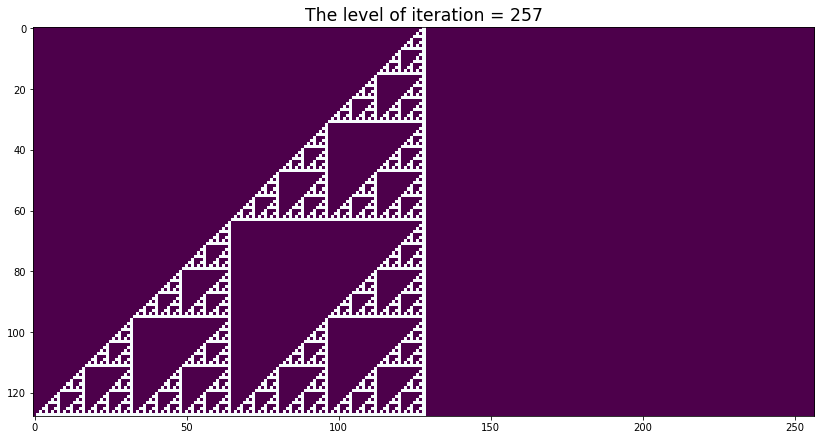

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (14,14)
plt.imshow(tot_list, cmap=plt.cm.BuPu_r)
plt.title('The level of iteration = {}'.format(n), loc = 'center', fontsize = 'xx-large')
plt.show()

<div dir='rtl'><h2>روش دوم</h1></div> 
<div dir='rtl'>ما برای روش دوم:

*  ابتدا با استفاده از تابع ()gen اعداد جدول خیام-پاسکال را تولید کرده ایم.
*  سپس با استفاده از تابع ()draw هر خط لیست را ابتدا به str تبدیل کردیم تا بتوانیم آن ها را با استفاده از متد center وسط چین کنیم.
* بعد دوباره آن را به حالت لیست برگرداندیم و به جای اعداد فرد 1 و به جای بقیه 0 قرار دادیم و در نهایت لیست متقارن را تشکیل دادیم و رسم کردیم و ایندفعه شکل صاف و متقارن به دست آمد! 
</div>

In [ ]:
def gen(n,r=[]):
    for x in range(n):
        l = len(r)
        r = [1 if i == 0 or i == l else r[i-1]+r[i] for i in range(l+1)]
        r = [1 if i%2==1 else 0 for i in r]
        yield r

In [ ]:
def draw(n):
    # generate the pascals triangle list
    ps = list(gen(n))
    max = len('0'.join(map(str,ps[-1])))
    final_list = []
    for p in ps:
        # here we change to str and fold in the middle
        x = list('0'.join(map(str,p)).center(max))
        # now change to list of numbers again to plot
        x = [0 if i==' ' else int(i) for i in x]
        final_list.append(x)
    return final_list

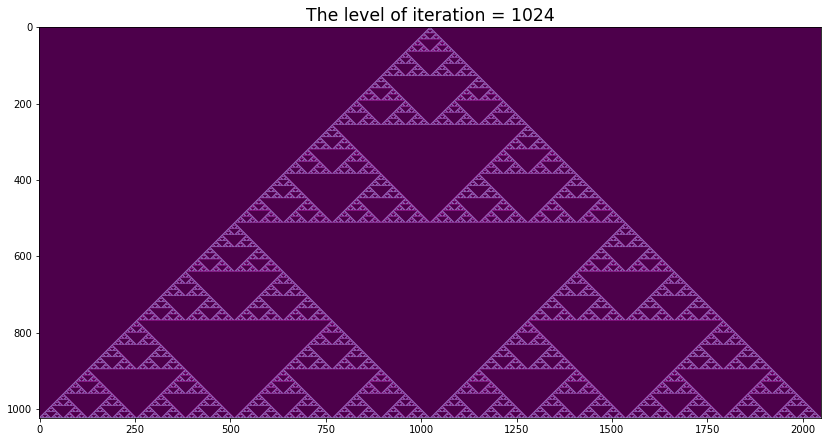

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
m = 1024
plt.rcParams["figure.figsize"] = (14,14)
plt.imshow(draw(m), cmap=plt.cm.BuPu_r)
plt.title('The level of iteration = {}'.format(m), loc = 'center', fontsize = 'xx-large')
plt.show()

# Barnsley Fern fractal

<div dir='rtl'><h1 id="Barnsley Fern">برگ سرخس : </h1></div>
<div dir='rtl'> برای رسم این شکل مراحل زیر طی میشود:

*  پس از تعیین تصادفی نقطه اولیه، از چهار عملگر که فقط متشکل از تجانس و انتقال هستند (مقادیر دقیق این ماتریس های انتقال و تجانس در ویکی پدیا موجود است: https://en.wikipedia.org/wiki/Barnsley_fern)
بصورت زیر استفاده میکنیم.
* با الگوریتم تصادفی یکی از این چهار تغییر روی نقطه اعمال شده و در لیست نهایی ذخیره میشود.
*  برای زیبایی و دقت بیشتر خروجی میتوان احتمال اعمال توابع را به صورت غیر یکنواخت تعیین کرد.
 ما احتمالات را بصورت زیر مشخص کرده ایم: 
 
 p = [.05, .7, .125, .125] 
</div>

In [ ]:
# this function gets the m_level of iteration
# and generates apropriate points with one of the 4 action n=[1, 2, 3, 4]
# in every iteration
def Barnsley_Fern(m):
  x, y = np.random.randint(0,1, 2)
  points = np.array([x,y])
  x_points = []
  y_points = []
  f_values = [1,2,3,4]
  for j in range(m):
    n = np.random.choice(f_values, p = [.05, .7, .125, .125])
    if n==1:
      points = np.dot(np.array([[0, 0],[0, .16]]),points)
    elif n==2:
      points = np.dot(np.array([[.85, 0.04],[-0.04, .85]]),points) + (0, 1.6)
    elif n==3:
      points = np.dot(np.array([[.2, -0.26],[0.23, .22]]),points) + (0, 1.6)
    else:
      points = np.dot(np.array([[-0.15, 0.28],[0.26, 0.24]]),points) + (0, 0.44)
    x_points.append(points[0])
    y_points.append(points[1])
  return x_points, y_points

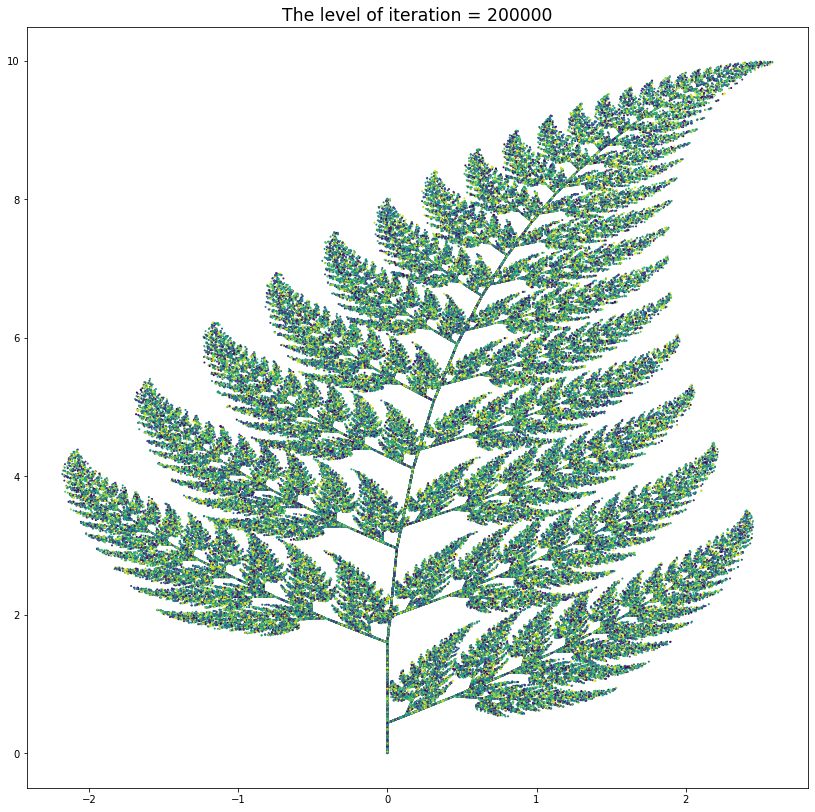

In [ ]:
m = 200000
X, Y=Barnsley_Fern(m)
colors = np.random.rand(m)
plt.scatter(X, Y, c=colors, s=1)
plt.title('The level of iteration = {}'.format(m), loc = 'center', fontsize = 'xx-large')
plt.show()

# Implementation of some fractals with OOP

<div dir='rtl'><h2>در این بخش سعی کرده ام بعضی از کد های تابعی که بالا نوشته ام را یکبار هم با رویکرد شیء گرایی پیاده سازی کنم. بنابراین از آنجایی که توابع به کار برده شده در کلاس ها با توابع بالا تقریبا یکسان است، از توضیح بیشتر صرفنظر کرده ام.</h2></dir>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [ ]:
class Fractal():
  def __init__(self, m, color):
    self.level = m
    self.color = color
    self.plot_list = None

  def Display_imshow(self):
    plt.rcParams["figure.figsize"] = (14,14)
    plt.imshow(self.plot_list, cmap=plt.cm.BuPu_r)
    plt.title('The level of iteration = {}'.format(self.level), loc = 'center', fontsize = 'xx-large')
    plt.show()

  def Display_coord(self):
    # Ensures equal aspect ratio.
    plt.axes().set_aspect('equal', 'datalim')
    # Converts a list of coordinates into 
    # lists of X and Y values, respectively.
    X, Y = zip(*self.plot_list)
    # Draws the plot.
    plt.rcParams["figure.figsize"] = (20,12)
    plt.plot(X, Y, linewidth= 0.5, color= self.color)
    plt.title('The level of fractal = {}'.format(self.level), loc = 'center', fontsize = 'xx-large')
  def Display_triangle(self):
    plt.rcParams["figure.figsize"] = (10,10)
    plt.ylim(0,100)
    plt.xlim(0,100)
    plt.title(f"level = %s"%self.level)
    ax = plt.axes()
    for tr in self.plot_list:
        ax.add_patch(Polygon(tr, color = self.color))
  def Display_scatter(self):
    X = self.plot_list[0]
    Y = self.plot_list[1]
    if self.color==None:
      colors = np.random.rand(self.level)
    else:
      colors = self.color
    plt.scatter(X, Y, c=colors, s=1)
    plt.title('The level of iteration = {}'.format(self.level), loc = 'center', fontsize = 'xx-large')
    plt.show()

In [ ]:
class Koch(Fractal):
  def Rotation(self, theta): #this fuction create the rotation matrix with theta in degrees
    theta = np.radians(theta)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    return R
  def f_koch(self): #this fuction gets the older points and create all the new points for every level.
      new_list = []
      f1 = np.dot(np.array([[1/3,0],[0,1/3]]), self.points) #f1: just scaling with 1/3(create first point)
      new_list.append(f1)
      f2 = np.dot(self.Rotation(60),np.dot(np.array([[1/3,0],[0,1/3]]), self.points)) 
      f2 = f2 + f1
      #f2: scale, rotate and shift(create 2nd point)
      new_list.append(f2)
      f3 = np.dot(np.array([[1/3,0],[0,1/3]]), self.points) 
      f3 = f3 + f1
      #f3: just scaling with 1/3 and shift(create 3rd point)
      new_list.append(f3)
      f4 = np.dot(np.array([[1/3,0],[0,1/3]]), self.points)  
      f4 = f4 + f3
      #f4: just scaling with 1/3 and shift(create 4th point)
      new_list.append(f4)
      return new_list

  # this function gets the m_level of iteration and export the fractal
  def koch(self):
    point_list = [np.array([0,0]), np.array([1,0])]
    tot_list = [np.array([0, 0])]
    n=0
    while n<self.level:
      tot_list = [np.array([0, 0])]
      for i in range(1, len(point_list)):
        # generate the new points and concatenate to the tot_list
        self.points = point_list[i]-point_list[i-1]
        l = (tot_list, self.f_koch() + point_list[i-1])
        tot_list = np.vstack(l)
      point_list = [np.array([0,0])] + tot_list 
      n+=1
    self.plot_list = tot_list
    return self.Display_coord()

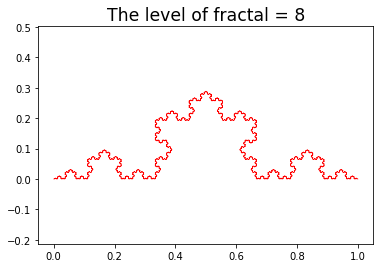

In [ ]:
Koch(8, 'red').koch()


In [ ]:
class Heighway(Fractal):
  def Rotation(self, theta): #this fuction create the rotation matrix with theta in degrees
    theta = np.radians(theta)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    return R
  #f1: this fuction scales and rotates the point counterclockwise
  def f1(self):
      new_list = []
      f1 = np.dot(self.Rotation(45),np.dot(np.array([[1/(2**0.5),0],[0,1/(2**0.5)]]), self.points)) 
      new_list.append(f1)
      return new_list

  #f2: this fuction scales and rotates the point clockwise
  def f2(self):
      new_list = []
      f2 = np.dot(self.Rotation(-45),np.dot(np.array([[1/(2**0.5),0],[0,1/(2**0.5)]]), self.points)) #f1
      new_list.append(f2)
      return new_list

  def heighway(self):
    point_list = [np.array([0,0]), np.array([1,0])]
    tot_list = [np.array([0, 0])]
    n=0
    while n<self.level:
      tot_list = [np.array([0, 0])]
      for i in range(1, len(point_list)):
        # generate new points with every other one iteration on f1 and f2
        # and then concatenate new_points to the tot_list
        if i%2==1:
            self.points = point_list[i]-point_list[i-1]
            l = (tot_list, self.f1() + point_list[i-1], point_list[i])
            tot_list = np.vstack(l)
        else:
            self.points = point_list[i]-point_list[i-1]
            l = (tot_list, self.f2() + point_list[i-1], point_list[i])
            tot_list = np.vstack(l)  
    
      g = (tot_list, [np.array([1, 0])])
      tot_list = np.vstack(g)
      point_list = [np.array([0,0])] + tot_list 
      n+=1
    self.plot_list = tot_list
    return self.Display_coord()

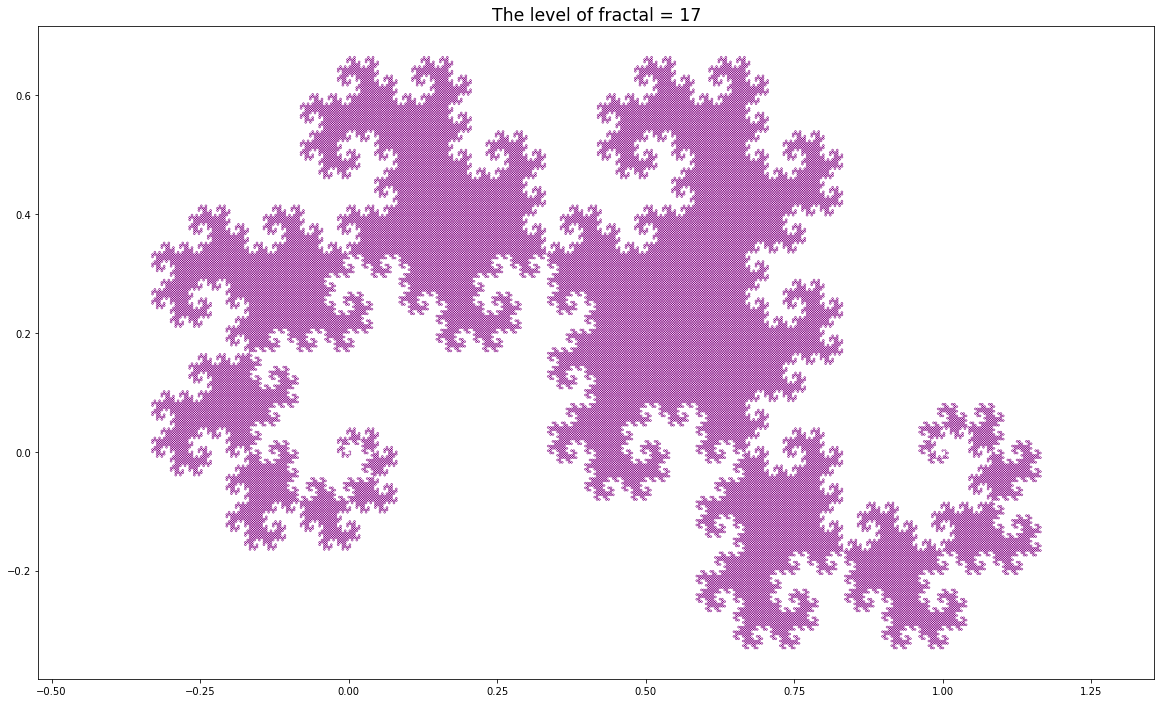

In [ ]:
Heighway(17, 'purple').heighway()

In [ ]:
class Sierpinsky_Triangle(Fractal):

  def NewTrinagle(self, Pos = np.array([ np.array([0,0]) , np.array([50,50*3**0.5]) , np.array([100,0]) ]) ):

      newTrinagle = []

      line21 = (Pos[2][:] - Pos[1][:])/2
      line10 = (Pos[1][:] - Pos[0][:])/2
      line20 = (Pos[2][:] - Pos[0][:])/2

      newTrinagle.append(np.array([Pos[0][:]+line20 , Pos[1][:]+line21 ,Pos[2][:] ]))
      newTrinagle.append(np.array([Pos[0][:] , Pos[0][:]+line10 ,Pos[0][:]+line20 ]))
      newTrinagle.append(np.array([Pos[0][:]+line10 , Pos[1][:] ,Pos[1][:]+line21 ]))

      return newTrinagle

  # this function display the fractal
  def generate(self):
      # initialization
      oldtr = self.NewTrinagle()
      # generate new_triangles and put it in oldtr to plot
      for i in range((self.level)-1):
          newtr =[]
          for tr in oldtr:
              newtr = newtr + self.NewTrinagle(tr)
          oldtr = newtr
      self.plot_list = oldtr
      return self.Display_triangle()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


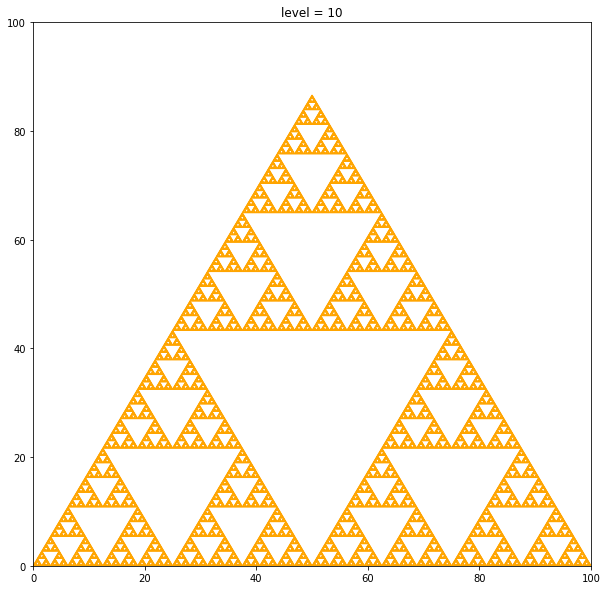

In [ ]:
Sierpinsky_Triangle(10, 'orange').generate()

In [ ]:
class Fern(Fractal): 
  def Barnsley_Fern(self):
    x, y = np.random.randint(0,1, 2)
    points = np.array([x,y])
    x_points = []
    y_points = []
    f_values = [1,2,3,4]
    for j in range(self.level):
      n = np.random.choice(f_values, p = [.05, .7, .125, .125])
      if n==1:
        points = np.dot(np.array([[0, 0],[0, .16]]), points)
      elif n==2:
        points = np.dot(np.array([[.85, 0.04],[-0.04, .85]]), points) + (0, 1.6)
      elif n==3:
        points = np.dot(np.array([[.2, -0.26],[0.23, .22]]), points) + (0, 1.6)
      else:
        points = np.dot(np.array([[-0.15, 0.28],[0.26, 0.24]]), points) + (0, 0.44)
      x_points.append(points[0])
      y_points.append(points[1])
    self.plot_list = []
    self.plot_list.append(x_points)
    self.plot_list.append(y_points)
    return self.Display_scatter()

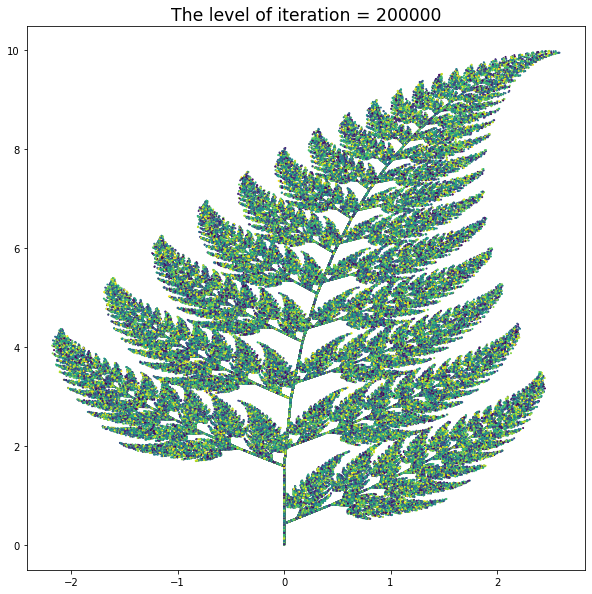

In [ ]:
Fern(200000, None).Barnsley_Fern()